**Importing modules**

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**import the data set and split the data sets into inputs and outputs.**

In [2]:
# importing the dataset
dataset = pd.read_csv('NaiveBayes.csv')

# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

**divide the input and output values into the training and testing**

In [3]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)


**scale our dataset to be ready to be used for the training.**

Note: scaling (or standardization) of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.

# Training the model using Bernolli Naive Bayes classifier

In [4]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

**accuracy of the predicted values using the Bernoulli Naive Bayes classifier.**

In [5]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.68


# Training model using Gaussian Naive Bayes Classifier

In [6]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)

**accuracy of our model**

In [7]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))

0.9


# Evaluating Naive Bayes Classification performance

**Evaluation of Bernoulli Naive Bayes classifier**

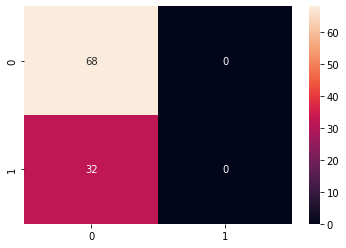

In [10]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
#plt.savefig('confusion.png')

**Evaluation of Gaussian Naive Bayes Classifier**

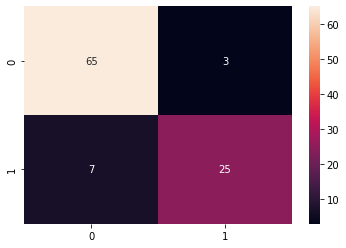

In [11]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)

# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion1.png')

In real life, the data does not always consist of numeric values. For example, playing or not playing are not numeric values. In such scenarios, we need to convert the non-numeric data to numeric values before feeding data to our model. For example, we have the following dataset about whether players will play sport or not, depending on the weather and temperature.

In [12]:
# assigning features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

# output class
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Note: the input and output both are not numeric values. Before feeding this data to our model, we have to encode the non-numeric values into numeric ones. for example, Overcast = 0, Rainy = 1, Sunny = 2. This is called label encoding.

In [20]:
# Import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# Converting string labels into numbers.
wheather_encoded =labelCode.fit_transform(weather)

The LabelEncoder will convert the string values to numeric values. For example, if we print the encoded weather, it will no longer contain numeric values.

In [21]:
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


**Similarly, we can also encode the play class.**

In [23]:
# import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# converting string labels into numbers.
label=labelCode.fit_transform(play)

Generating model

We have already seen that our input values are in a single-dimensional array. By default, the model training takes values in multi-dimensional arrays. If we feed the data without further changes, we will get the following error.

In [25]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
model = GaussianNB()

# train the model using the training sets
model.fit(wheather_encoded, label)

So, we need to convert our data to the 2D array before feeding it to our model. Here we will use NumPy array and reshape() method to create a 2D array.

In [27]:
# importing numpy module
import numpy as np

# converting 1D array to 2D
weather_2d = np.reshape(wheather_encoded, (-1, 1))

**We can train our model using this data.**

In [28]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
model = GaussianNB()

# train the model using the training sets
model.fit(weather_2d, label)

GaussianNB()

We had used the Gaussian Naive Bayes classifier to train our model. Let us predict the output by providing a testing input.

In [29]:
# predicting the odel
predicted= model.predict([[0]]) # 0:Overcast

# printing predicted value
print(predicted)

[1]


**The output value 1 indicates that players will Play when there’s an Overcast weather.**

# Naive Bayes Classification with Multiple Labels

**will learn about Naive Bayes classification for multiple labels.**

For the training, we will use the built-in data set from the sklearn module named load_wine. This dataset results from a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The dataset consists of 13 features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three types of wine Class_0, Class_1, and Class_3. We can build a model to classify the type of wine using Naive Bayes Classification.

In [30]:
# import scikit-learn dataset library
from sklearn import datasets

# load dataset
dataset = datasets.load_wine()

we can print the input/features and target/output variables names to ensure the desired dataset.

In [31]:
# print the names of the 13 features
print ("Inputs: ", dataset.feature_names)

# print the label type of wine
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


We check the type of data (numeric/non-numeric) by printing three rows from the dataset.

In [1]:
# print the wine data features
print(dataset.data[0:3]) #top 3 rows

NameError: name 'dataset' is not defined

We can also check the output values to verify that it is a multi-class classification dataset.

In [32]:
# print the wine labels 
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Training the model using multiclass labels

Before feeding the dataset to our model, let us split the dataset into training and testing parts to evaluate our model by providing the testing dataset.

In [33]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# input and outputs
inputs = dataset.data
outputs = dataset.target

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

Once the splitting is complete, we can feed our model with the training data.

In [34]:
#Training the model
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer = GaussianNB()

# train the model using the training sets
classifer.fit(X_train, y_train)

# predict the response for test dataset
y_pred = classifer.predict(X_test)

Note: we have used the Gaussian Naive Bayes classification method for the training.

Let us now check the accuracy of our model:

In [35]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


# Evaluation of Naive Bayes Classifier for Multiclassification

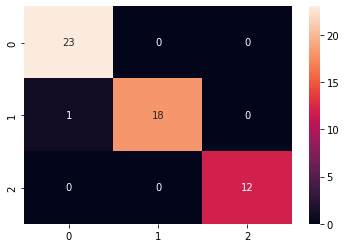

In [36]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion2.png')